In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

# Looking at the dataset
The goal of this project is to determine what factors affect the customer churn rate. 
First I will go over the data provoded and take a look at the seperate features will minimal data adjustment. I will then start data preprocessing and looking to manipulate the data to better understand relationships 

In [53]:
# load dataset
data= pd.read_csv('data/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
# remove customer ID
data.drop(columns=['customerID'], inplace=True)




In [55]:
# list oput the columns names 
column_names = data.columns.tolist()
print("Column names:", column_names)

# no. of columns
num_columns = len(column_names)
print("Total number of columns:", num_columns)

#print numerical colums
numeric_cols = data.select_dtypes(include='number').columns.tolist()
print("Numerical columns:", numeric_cols)

non_numeric_cols = data.select_dtypes(exclude='number').columns.tolist()
print("Non-numerical columns:", non_numeric_cols)

Column names: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Total number of columns: 20
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Non-numerical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


The code above shows that there are 19 columns that can be used to predict churn with majority of them being catergorical. Below are some graphs to find the split of features within the dataset.
Before getting into that I left 2 columns were as the wrong data type. 
- TotalCharges needs to be a numeric value 
- Senior Citizen needs to be a catergorial variable

In [56]:
#total charges 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# senior citizen
data['SeniorCitizen']= data['SeniorCitizen'].map({1: 'Yes', 0: 'No'})


numeric_cols = data.select_dtypes(include='number').columns.tolist()
print("Numerical columns:", numeric_cols)

non_numeric_cols = data.select_dtypes(exclude='number').columns.tolist()
print("Non-numerical columns:", non_numeric_cols)


Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Non-numerical columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


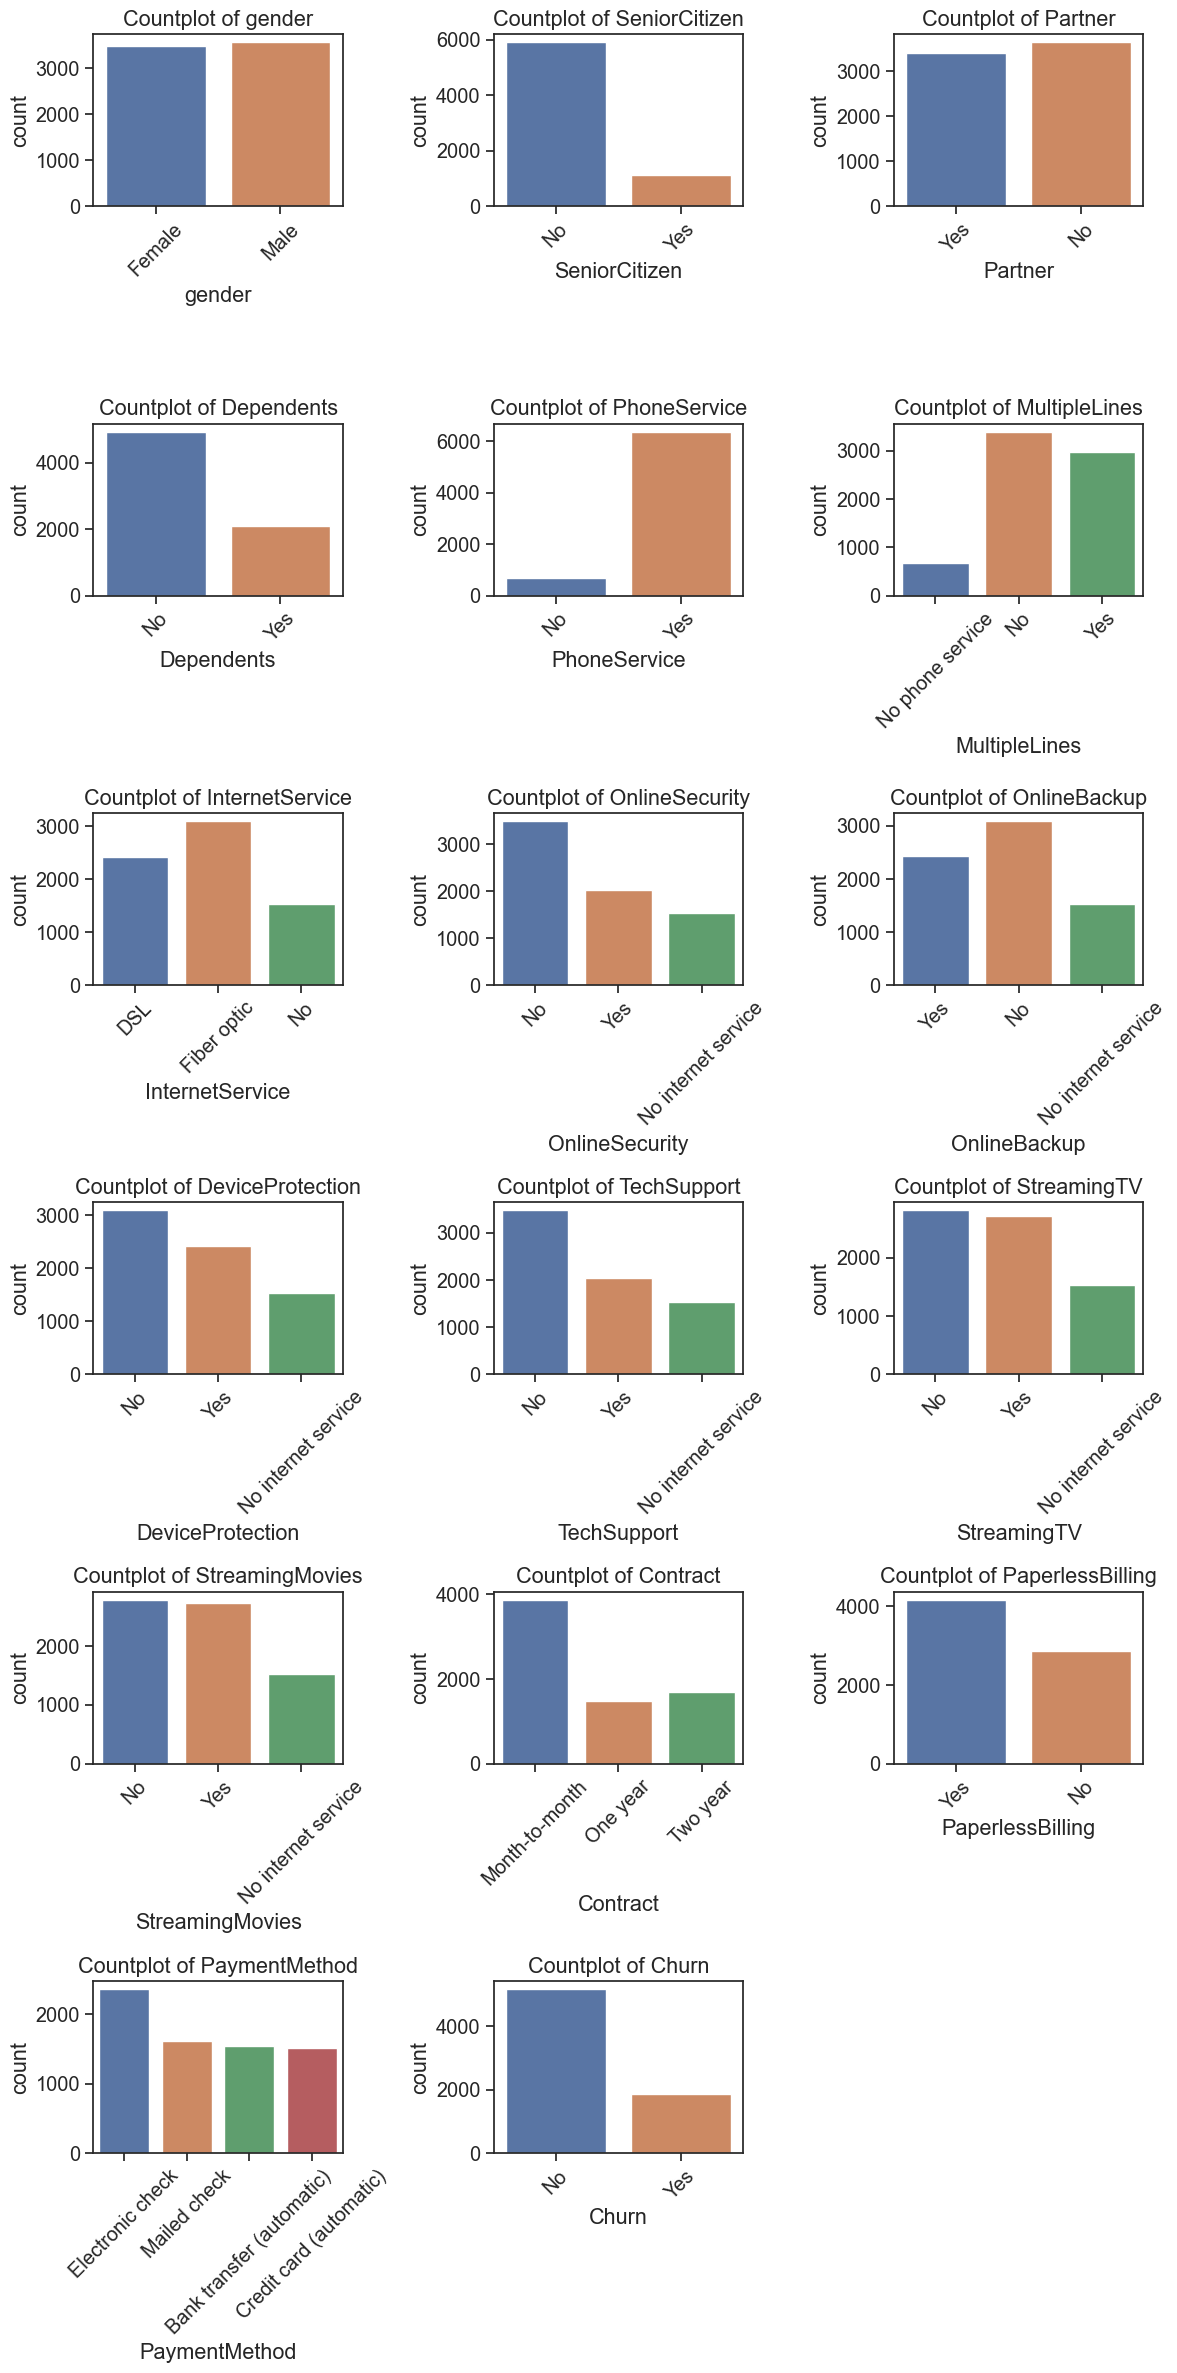

In [57]:
n_cols = 3 
n_rows = (len(non_numeric_cols) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(non_numeric_cols):
    sns.countplot(data=data, x=col, ax=axes[i], hue=non_numeric_cols[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Non numeric features
Above is a look at the data distribution of all the non numeric features
First looking at Churn as it is what we plan to predict- there is majority customers that retain in the dataset. An estimate ratio is 1:3 cutsomers churn. 

Looking from top right to bottom left:
- The features Gender and Partner are evenly split between the 2 catergories each
- most customers are not senior citizens
- Dependents is split in a 2:1 towards NO
- Nearly all customers have a phone service which is reflected in the multiple lines plot 
    - note remove the no phone service from multiple line graph in the future
- The other graphs look normal with none standing out in particular
- A good portion of the following graphs have a reptive number for the number of users with no internet service. 
    - should find a way to remove this repitive information
- should change the name of option in Payment method to remove '(automatic)' from the catergory when ploting graphs, no need when one hot encoding

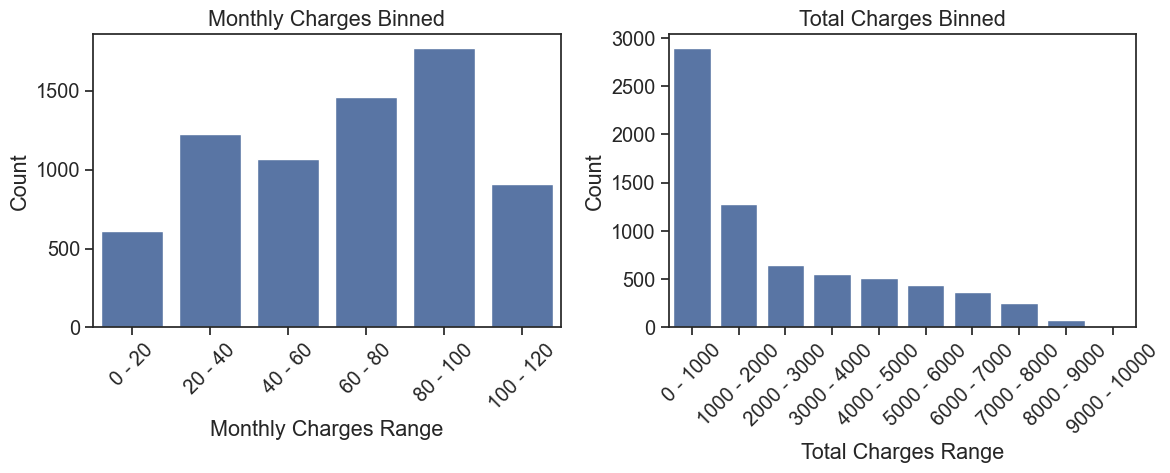

In [58]:

#create bins for plot
bins0 = range(0, 140, 20)
data['Monthly_Bin'] = pd.cut(data['MonthlyCharges'], bins=bins0, right=False)
bin0_counts = data['Monthly_Bin'].value_counts().sort_index()

bins1 = range(0, 11000, 1000)
data['Total_Bin'] = pd.cut(data['TotalCharges'], bins=bins1, right=False)
bin1_counts = data['Total_Bin'].value_counts().sort_index()

# Create bin labels that include the upper bound
bin0_labels = [f"{int(interval.left)} - {int(interval.right)}" for interval in bin0_counts.index]
bin1_labels = [f"{int(interval.left)} - {int(interval.right)}" for interval in bin1_counts.index]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=bin0_labels, y=bin0_counts.values, ax=axes[0])
axes[0].set_title('Monthly Charges Binned')
axes[0].set_xlabel('Monthly Charges Range')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=bin1_labels, y=bin1_counts.values, ax=axes[1])
axes[1].set_title('Total Charges Binned')
axes[1].set_xlabel('Total Charges Range')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


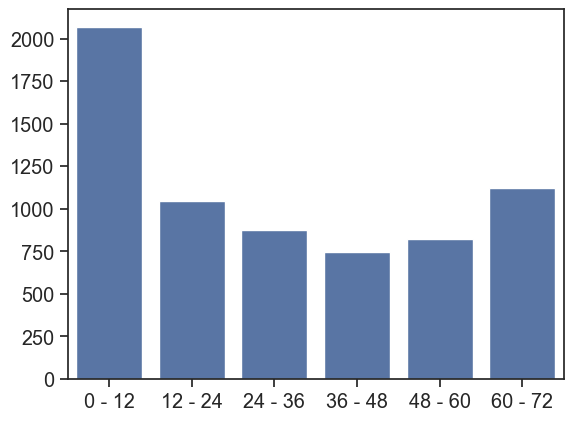

In [59]:

#create bins for plot
bins = range(0, 84, 12)
data['tenure_bin'] = pd.cut(data['tenure'], bins=bins, right=False)
bin_counts = data['tenure_bin'].value_counts().sort_index()
bin_labels = [f"{int(interval.left)} - {int(interval.right)}" for interval in bin_counts.index]

sns.barplot(x=bin_labels, y=bin_counts.values)
axes[0].set_title('tenure Binned')
axes[0].set_xlabel('tenure Range')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

## Numerical data
- The total charges decreases expoentially meaning very few people are long time customers or are in small packages where there is small amounts charged
- the monthly charges are well distributed meaning the income to the store is from a various amount of services combined
- Looking at the tensure graph we can infer that either the buisness got popular reletively recently so the new influx of customers are new customers around the 0-24 months period or most customers that do churn do it between the 2-5 year period. There are also a good amount of loyal customers.

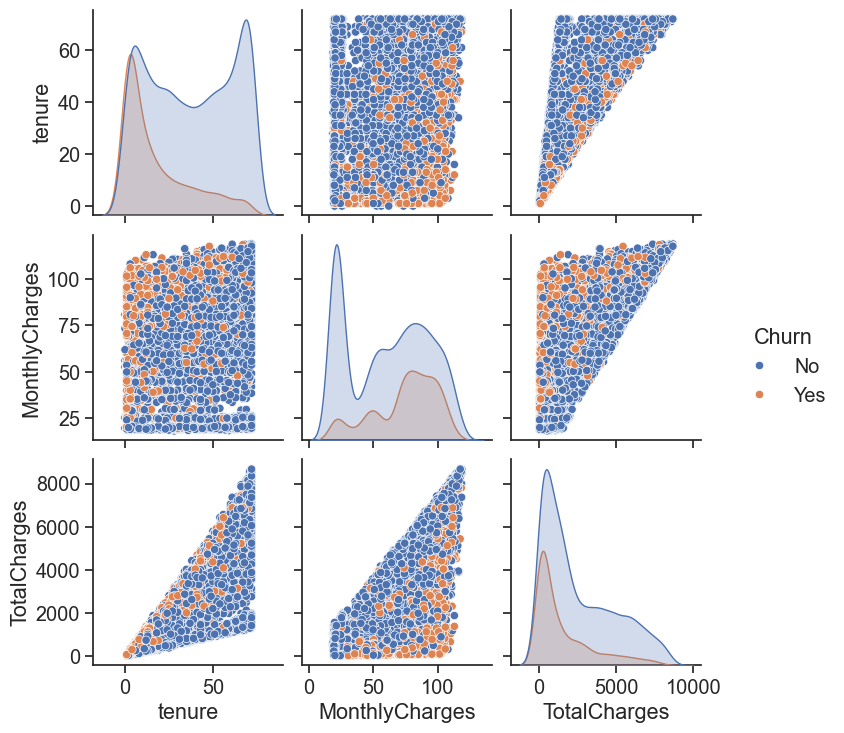

In [60]:
sns.pairplot(data, hue='Churn', diag_kind='kde')  # or diag_kind='hist'
plt.show()

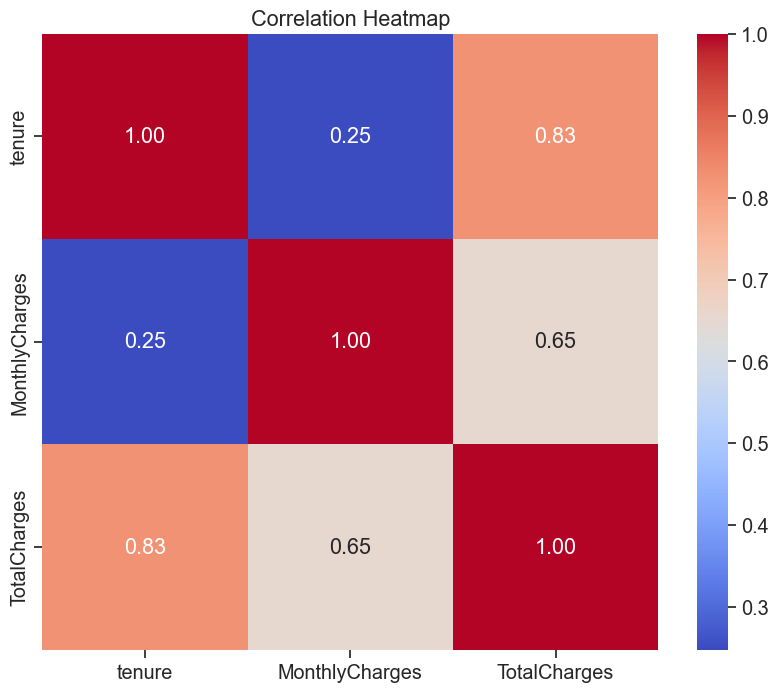

In [61]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

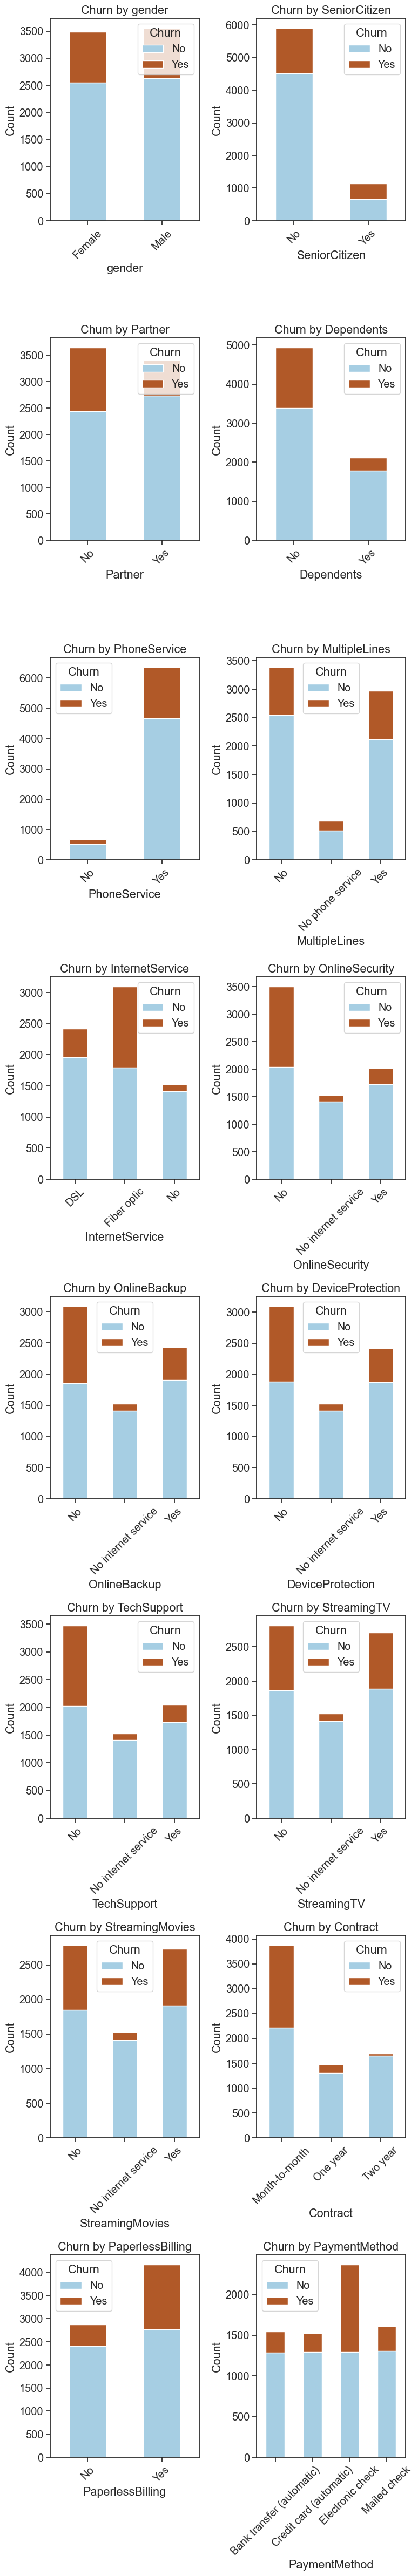

In [80]:

# remove churn since used as hue
#non_numeric_cols.remove('Churn')


fig, axes = plt.subplots(math.ceil(len(non_numeric_cols)/2), 2, figsize=(8, 3*len(non_numeric_cols)))
axes = axes.flatten()
'''
# side by side bars for churn vs other catergorical var
for i, col in enumerate(non_numeric_cols):
    ax = axes[i] if len(non_numeric_cols) > 1 else axes  
    sns.countplot(data=data, x=col, hue='Churn', ax=ax, palette='pastel')
    ax.set_title(f'Churn by {col}')
    ax.set_ylabel("Count")
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)
    '''

#stacked barplots

for i, col in enumerate(non_numeric_cols):
    stacked = data.groupby([col, 'Churn']).size().unstack(fill_value=0)
    stacked.plot(kind='bar', stacked=True, ax=axes[i], colormap='Paired')
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## bivariate analysis
The graphs above are the last part of the data exploration
The goal is to see it any of the features have relenvce to churn such that majority of 1 subset of customers churn under a specific situation with simple co-relation
However, we need to be carful when dealing with this data as in general there are less people churning than not, to prevent this we need to pay attension to the churn bars more than the bars without churn

- directly we can say that gender alone has no effect on the churn rate as it is evenlyu split between them. 
- approximately 40% of senior citizens churn
- customers without partners or dependents are more likely to churn 
- nothing much can be gained from the phone line graphs
- it seems people with fibre optic, no online security, no online backup, no device protection, and no tech support  tend to be more likely to churn
- the streaming services have little affect
- month to month contracts tend to be more likely to churn than the yearly and 2 year contracts
- when paid with electronic check customers tend to churn

Overall, this gave us an idea of where to start with when plotting and finding relationships between features and churn  rate

# Data Preprocessing


In [ ]:
def handle_missing_values(df):
    numeric_cols = df.select_dtypes(include='number').columns
    non_numeric_cols = df.select_dtypes(exclude='number').columns

    # fill with mean value if numeric value is na
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    # remove row if non-numeric value is na
    df = df.dropna(subset=non_numeric_cols)

    return df

# if na value exists call function
if pd.isna(data).sum().sum():
    handle_missing_values(data)